In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime as dt
import math
%matplotlib inline

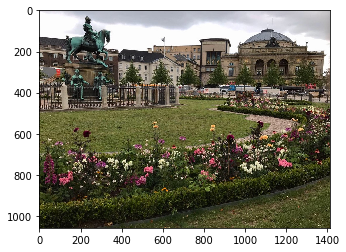

In [2]:
pic = mpimg.imread('sample.JPG')
plt.imshow(pic)

In [3]:
def pixelate(pic, new_h, new_w):
    # pic is a numpy array of an image with rgb values (i.e. pic.shape[2] is 3)
    # returns new image pixelated to dimensions new_h x new_w (height x width) as a numpy array
    # the lower new_h and new_w, the more pixelated
    #
    # NOTE: this method does not account for distortion so ensure...
    # the aspect ratio of the new image is approximately...
    # equal to the aspect ratio of the old image
    old_h = pic.shape[0]
    old_w = pic.shape[1]
    new_shape = (new_h, new_w, 3)
    new_pic = np.zeros(new_shape)
    h_i = old_h / new_h
    w_i = old_w / new_w
    h_counter = 0
    h_points = np.zeros(new_h + 1, dtype='int32')
    for i in range(new_h):
        h_points[i] = int(round(h_counter))
        h_counter += h_i
    h_points[new_h] = old_h
    w_counter = 0
    w_points = np.zeros(new_w + 1, dtype='int32')
    for i in range(new_w):
        w_points[i] = int(round(w_counter))
        w_counter += w_i
    w_points[new_w] = old_w
    for i in range(len(h_points) - 1):
        for j in range(len(w_points) - 1):
            pixels = 0
            rgb = np.zeros(3)
            h = h_points[i]
            while (h < h_points[i + 1]):
                w = w_points[j]
                while (w < w_points[j + 1]):
                    rgb = np.add(rgb, pic[h, w])
                    pixels += 1
                    w += 1
                h += 1
            rgb = divideArray(rgb, pixels)
            new_pic[i][j] = rgb
    return new_pic.astype(int)

In [25]:
def blur(pic, blur_factor=2):
    # pic is a numpy array of an image with rgb values (i.e. pic.shape[2] is 3)
    # blur_factor is set to 2, but if it is increased it will blur the image further
    # returns a numpy array of the same dimensions as pic
    #
    # NOTE: this algorithm handles blur_factor up to around 10 before it begins to slow down significantly
    height = pic.shape[0]
    width = pic.shape[1]
    new_pic = np.zeros(pic.shape)
    for i in range(height):
        for j in range(width):
            pixels = 0
            rgb = np.zeros(3)
            h = i - blur_factor
            while(h <= i + blur_factor):
                w = j - blur_factor
                while (w <= j + blur_factor):
                    if (h > -1 and h < height and w > -1 and w < width):
                        rgb = np.add(rgb, pic[h][w])
                        pixels += 1
                    w += 1
                h += 1
            rgb = divideArray(rgb, pixels)
            new_pic[i][j] = rgb
    return new_pic.astype(int)

In [5]:
def grayscale(pic):
    # pic is a numpy array of an image with rgb values (i.e. pic.shape[2] is 3)
    # returns numpy array of grayscale image
    new_pic = np.zeros(pic.shape)
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            rgb = (pic[i][j][0] + pic[i][j][1] + pic[i][j][2]) / 765
            new_pic[i][j] = rgb
    return new_pic

In [16]:
def whiteFilter(pic, c):
    # pic is a numpy array of an image with rgb values (i.e. pic.shape[2] is 3)
    # c is a value from 0 to 1; the higher c is, the more white the filter
    new_pic = np.zeros(pic.shape)
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            rgb = pic[i][j]
            for k in range(3):
                rgb[k] += c*(255 - rgb[k])
            new_pic[i][j] = rgb
    return new_pic.astype(int)

In [17]:
def blackFilter(pic, c):
    # pic is a numpy array of an image with rgb values (i.e. pic.shape[2] is 3)
    # c is a value from 0 to 1; the higher c is, the more black the filter
    new_pic = np.zeros(pic.shape)
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            rgb = pic[i][j]
            for k in range(3):
                rgb[k] -= c*rgb[k]
            new_pic[i][j] = rgb
    return new_pic.astype(int)

In [8]:
# useful values
MAX_COLOR_DIFF = 441.68
THRESHOLD = 30 # somewhat arbitrary value, 30 tends to work well on a couple of tested images
DELTA = MAX_COLOR_DIFF - THRESHOLD
def edgeDetection(pic):
    # pic is a numpy array of an image with rgb values (i.e. pic.shape[2] is 3)
    new_pic = np.zeros(pic.shape)
    for i in range(1, pic.shape[0]):
        for j in range(1, pic.shape[1]):
            this_px = pic[i][j]
            last_px_h = pic[i - 1][j]
            last_px_w = pic[i][j - 1]
            max_dist = max(colorDistance(this_px, last_px_h), colorDistance(this_px, last_px_w))
            if (max_dist > THRESHOLD):      
                x = (max_dist - THRESHOLD) / DELTA
                new_color = 255 * (5 + 3*math.sqrt(5)) * x / (10*x + 3*math.sqrt(5) - 5)
                rgb = multiplyArray(np.ones(3), new_color)
                new_pic[i][j] = rgb
    return new_pic.astype(int)

In [9]:
def crop(pic, y_i, x_i, y_f, x_f):
    # pic is a numpy array of an image with rgb values (i.e. pic.shape[2] is 3)
    # basic cropping function
    # (y_i, x_i) is top left point and (y_f, x_f) is bottom right
    # both points are in the form (height, width)
    return pic[y_i:y_f+1, x_i:x_f+1,:]

In [10]:
# useful method
def divideArray(x, m):
    for i in range(len(x)):
        x[i] = x[i] / m
    return x

In [11]:
# useful method
def multiplyArray(x, m):
    for i in range(len(x)):
        x[i] = x[i] * m
    return x

In [12]:
# useful method
def colorDistance(a, b):
    distance = 0
    for i in range(a.size):
        distance += (a[i] - b[i])**2
    return math.sqrt(distance)